In [1]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from keras.models import load_model
import foolbox
import numpy as np
import UtilHelper as utilh


Using TensorFlow backend.


In [2]:
model = load_model("cifar4_CNN_Epoch_100_Daug_True.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [3]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [5]:
foolmodel = foolbox.models.KerasModel(model, bounds=(0.0,1.0))

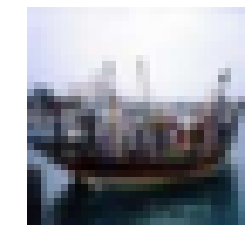

In [6]:
criterion = foolbox.criteria.Misclassification()
attack = foolbox.attacks.FGSM(foolmodel, criterion)

ind = 18
image = x_test[ind]
label = np.argmax(y_test[ind])
# test = model.predict(np.reshape(image,(1,32,32,3)))

image.shape
utilh.plotImage(image*255)

In [7]:
adversarial = attack(image, label,unpack=False)
adversarial_image = adversarial.image
adversarial_predict = model.predict(np.reshape(adversarial_image,(1,32,32,3)))

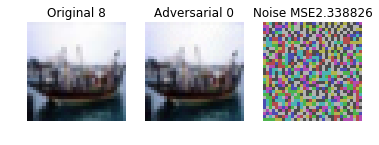

In [8]:
utilh.plotAllImages(image*255, adversarial_image*255, np.argmax(adversarial_predict), label, saveas = "images2.png")

In [10]:
adv_y_test = np.load("adversarial_y_test.npy")

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [9]:
# from keras.utils import plot_model
# plot_model(model,to_file="images_CNN_Model.png")

In [14]:
from collections import Counter

In [15]:
adv_labels = np.argmax(adv_y_test,axis=1)
countDict = Counter(adv_labels)
countDict
 

Counter({3: 1000,
         8: 1000,
         0: 1000,
         6: 934,
         1: 1000,
         9: 999,
         5: 1000,
         7: 1000,
         4: 1000,
         2: 1000})

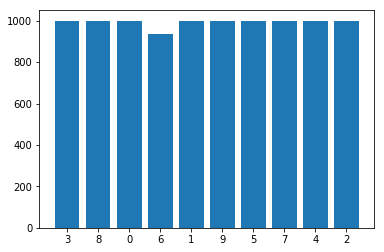

In [16]:
utilh.plotAdversarialDistribution(countDict)